In [1]:
## Air Quality Index analysis using the differernt model of machine learning 

In [2]:
## importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\AMAN DONGRE\\Downloads\\test1.csv")
df

Date        City     NH3     PM2    PM10    SO2     NOx    CO  \
0     01-01-2019   Ghaziabad   71.92  327.50  501.99  20.23  141.46  3.35   
1     02-01-2019   Ghaziabad   78.02  387.45  569.04  21.29  176.59  4.06   
2     03-01-2019   Ghaziabad   74.85  399.51  527.45  18.03  133.11  3.52   
3     04-01-2019   Ghaziabad   66.06  313.46  428.54  19.64   91.64  1.89   
4     05-01-2019   Ghaziabad   64.06  251.39  351.39  18.55   63.92  2.23   
...          ...         ...     ...     ...     ...    ...     ...   ...   
3809  20-06-2022    Bhiwadi    55.93   44.41   96.75   8.57   77.94  0.72   
3810  21-06-2022    Bhiwadi    61.08   47.80  104.82   8.93   82.73  0.78   
3811  22-06-2022    Bhiwadi    65.68   74.36  165.26   9.92   89.22  1.01   
3812  23-06-2022    Bhiwadi   129.75  166.03  317.93  16.01  157.82  1.17   
3813  24-06-2022    Bhiwadi    95.88  139.99  302.08  19.60  121.95  0.89   

         O3  
0     17.66  
1      9.32  
2     21.91  
3      8.96  
4      6.42  
...     ...  
3809   7.31  
3810   6.69  
3811   5.61  
3812   5.79  
3813   4.15  

[3814 rows x 9 columns]

<AxesSubplot:>

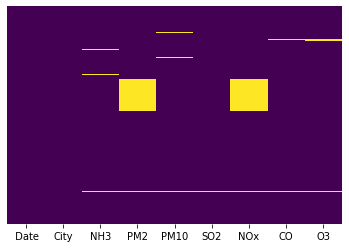

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())

 Date      0
City       0
NH3       56
PM2      572
PM10      47
SO2       20
NOx      573
CO        63
O3        70
dtype: int64


In [6]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

NOx      15.023597
PM2      14.997378
O3        1.835343
CO        1.651809
NH3       1.468275
PM10      1.232302
SO2       0.524384
 Date     0.000000
City      0.000000
dtype: float64

In [7]:
# filling the Nan values present in the pollutants with mean (city wise)
df.iloc[:, 2:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

C:\Users\AMAN DONGRE\AppData\Local\Temp\ipykernel_8176\390955663.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.iloc[:, 2:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))


In [8]:
df

Date        City     NH3     PM2    PM10    SO2     NOx    CO  \
0     01-01-2019   Ghaziabad   71.92  327.50  501.99  20.23  141.46  3.35   
1     02-01-2019   Ghaziabad   78.02  387.45  569.04  21.29  176.59  4.06   
2     03-01-2019   Ghaziabad   74.85  399.51  527.45  18.03  133.11  3.52   
3     04-01-2019   Ghaziabad   66.06  313.46  428.54  19.64   91.64  1.89   
4     05-01-2019   Ghaziabad   64.06  251.39  351.39  18.55   63.92  2.23   
...          ...         ...     ...     ...     ...    ...     ...   ...   
3809  20-06-2022    Bhiwadi    55.93   44.41   96.75   8.57   77.94  0.72   
3810  21-06-2022    Bhiwadi    61.08   47.80  104.82   8.93   82.73  0.78   
3811  22-06-2022    Bhiwadi    65.68   74.36  165.26   9.92   89.22  1.01   
3812  23-06-2022    Bhiwadi   129.75  166.03  317.93  16.01  157.82  1.17   
3813  24-06-2022    Bhiwadi    95.88  139.99  302.08  19.60  121.95  0.89   

         O3  
0     17.66  
1      9.32  
2     21.91  
3      8.96  
4      6.42  
...     ...  
3809   7.31  
3810   6.69  
3811   5.61  
3812   5.79  
3813   4.15  

[3814 rows x 9 columns]

<AxesSubplot:>

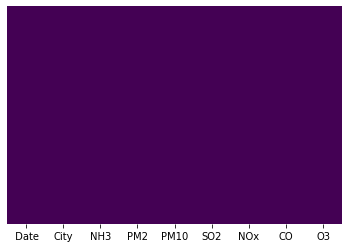

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#now calculating the AQI and AQI _bucket 
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].apply(lambda x: get_NH3_subindex(x))

In [11]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2"].apply(lambda x: get_PM25_subindex(x))

In [12]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))

In [13]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))

In [14]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))

In [15]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))

In [16]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))

In [17]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI"] = np.NaN
df.loc[df.Checks < 3, "AQI"] = np.NaN

df["AQI_bucket"] = df["AQI"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI.isna()].head(5)

Date        City    NH3     PM2    PM10    SO2     NOx    CO     O3  \
0  01-01-2019   Ghaziabad  71.92  327.50  501.99  20.23  141.46  3.35  17.66   
1  02-01-2019   Ghaziabad  78.02  387.45  569.04  21.29  176.59  4.06   9.32   
2  03-01-2019   Ghaziabad  74.85  399.51  527.45  18.03  133.11  3.52  21.91   
3  04-01-2019   Ghaziabad  66.06  313.46  428.54  19.64   91.64  1.89   8.96   
4  05-01-2019   Ghaziabad  64.06  251.39  351.39  18.55   63.92  2.23   6.42   

   NH3_SubIndex  PM2.5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  \
0       17.9800      459.615385       489.9875       25.2875        161.46   
1       19.5050      505.730769       573.8000       26.6125        196.59   
2       18.7125      515.007692       521.8125       22.5375        153.11   
3       16.5150      448.815385       398.1750       24.5500        111.64   
4       16.0150      401.069231       301.7375       23.1875         79.90   

   CO_SubIndex  O3_SubIndex  Checks    AQI AQI_bucket  
0      116.875        17.66       7  490.0     Severe  
1      125.750         9.32       7  574.0     Severe  
2      119.000        21.91       7  522.0     Severe  
3       94.500         8.96       7  449.0     Severe  
4      102.875         6.42       7  401.0     Severe

In [18]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
print(df.head(5))
print(df.shape)

         Date        City    NH3     PM2    PM10    SO2     NOx    CO     O3  \
0  01-01-2019   Ghaziabad  71.92  327.50  501.99  20.23  141.46  3.35  17.66   
1  02-01-2019   Ghaziabad  78.02  387.45  569.04  21.29  176.59  4.06   9.32   
2  03-01-2019   Ghaziabad  74.85  399.51  527.45  18.03  133.11  3.52  21.91   
3  04-01-2019   Ghaziabad  66.06  313.46  428.54  19.64   91.64  1.89   8.96   
4  05-01-2019   Ghaziabad  64.06  251.39  351.39  18.55   63.92  2.23   6.42   

   NH3_SubIndex  PM2.5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  \
0       17.9800      459.615385       489.9875       25.2875        161.46   
1       19.5050      505.730769       573.8000       26.6125        196.59   
2       18.7125      515.007692       521.8125       22.5375        153.11   
3       16.5150      448.815385       398.1750       24.5500        111.64   
4       16.0150      401.069231       301.7375       23.1875         79.90   

   CO_SubIndex  O3_SubIndex  Checks    AQI AQI_buc

<AxesSubplot:>

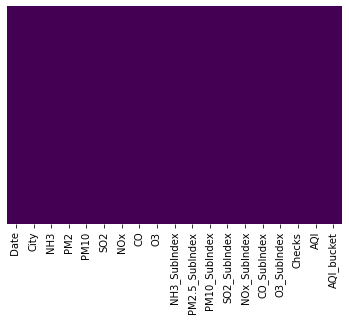

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
print(df.dtypes)

 Date              object
City               object
NH3               float64
PM2               float64
PM10              float64
SO2               float64
NOx               float64
CO                float64
O3                float64
NH3_SubIndex      float64
PM2.5_SubIndex    float64
PM10_SubIndex     float64
SO2_SubIndex      float64
NOx_SubIndex      float64
CO_SubIndex       float64
O3_SubIndex       float64
Checks              int32
AQI               float64
AQI_bucket         object
dtype: object


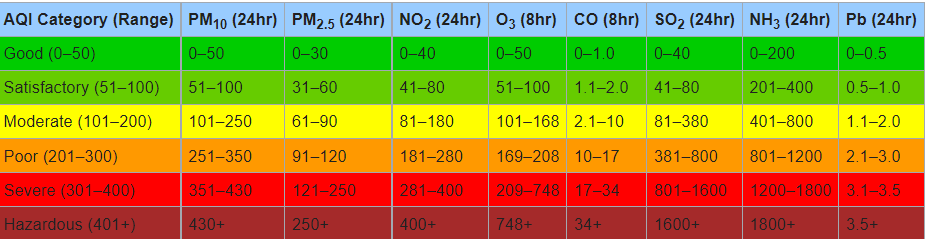

In [21]:
from IPython import display 
display.Image("C:\\Users\\AMAN DONGRE\\Downloads\\ima.png",width = 800, height = 200)

In [22]:
df.shape

(3814, 19)

In [23]:
df.describe()

NH3          PM2         PM10          SO2          NOx  \
count  3814.000000  3814.000000  3814.000000  3814.000000  3814.000000   
mean     59.146937   148.687580   161.874956    19.762776    55.598927   
std      50.347411    98.613611   134.039368    16.654645    37.372800   
min       0.100000     5.480000     1.920000     0.490000     0.000000   
25%      27.067500    69.642500    37.850000     8.130000    30.202500   
50%      40.820000   123.875000   138.515000    13.335000    52.920642   
75%      76.247500   229.680321   251.985000    26.687500    69.362500   
max     404.050000   607.370000   725.570000   123.270000   296.800000   

                CO           O3  NH3_SubIndex  PM2.5_SubIndex  PM10_SubIndex  \
count  3814.000000  3814.000000   3814.000000     3814.000000    3814.000000   
mean      1.017175    20.094191     14.786734      264.801245     142.816032   
std       0.756914    20.096912     12.586853      138.116723     119.748892   
min       0.000000     0.100000      0.025000        9.133333       1.920000   
25%       0.592500     8.320000      6.766875      132.141667      37.850000   
50%       0.830000    13.815000     10.205000      302.980769     125.676667   
75%       1.170000    24.327500     19.061875      384.369478     201.985000   
max       8.100000   199.500000    101.012500      674.900000     769.462500   

       SO2_SubIndex  NOx_SubIndex  CO_SubIndex  O3_SubIndex       Checks  \
count   3814.000000   3814.000000  3814.000000  3814.000000  3814.000000   
mean      24.624344     67.688306    47.738191    20.313387     6.990037   
std       20.457112     42.486501    26.356512    21.918356     0.099331   
min        0.612500      0.000000     0.000000     0.100000     6.000000   
25%       10.162500     37.753125    29.625000     8.320000     7.000000   
50%       16.668750     66.150802    41.500000    13.815000     7.000000   
75%       33.359375     86.703125    58.500000    24.327500     7.000000   
max      114.423333    314.000000   176.250000   278.750000     7.000000   

               AQI  
count  3814.000000  
mean    280.086523  
std     130.072738  
min      22.000000  
25%     163.000000  
50%     306.000000  
75%     384.000000  
max     769.000000

In [24]:
def plotvar(df, vari):
    plt.figure(figsize=(20,8))
    #histogram 
    plt.subplot(1,2,1)
    plt.hist(df[vari], alpha=0.5)
    
    #boxplt 
    plt.subplot(1,2,2)
    sns.boxplot(df[vari])
    plt.show()

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


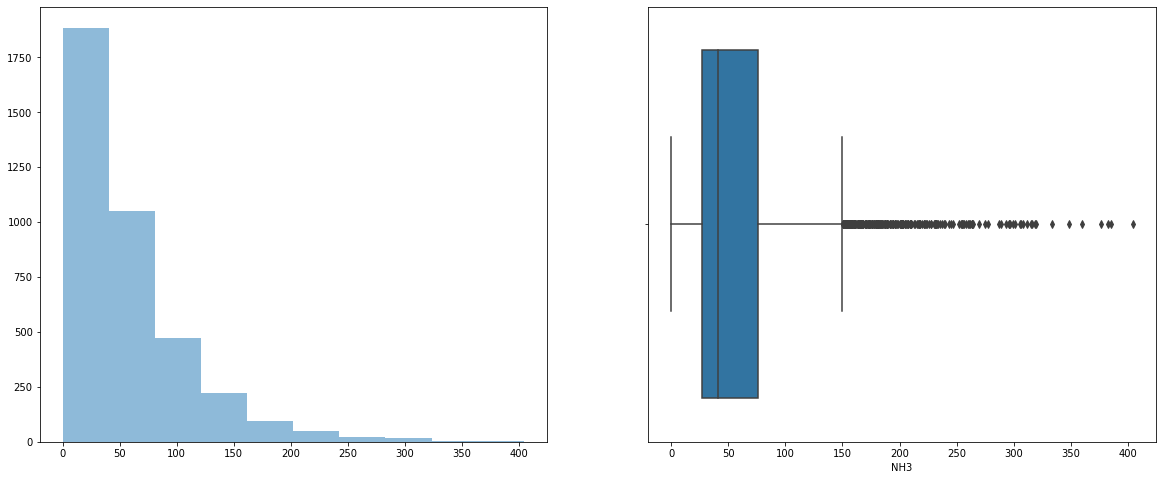

In [25]:
plotvar(df,'NH3')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


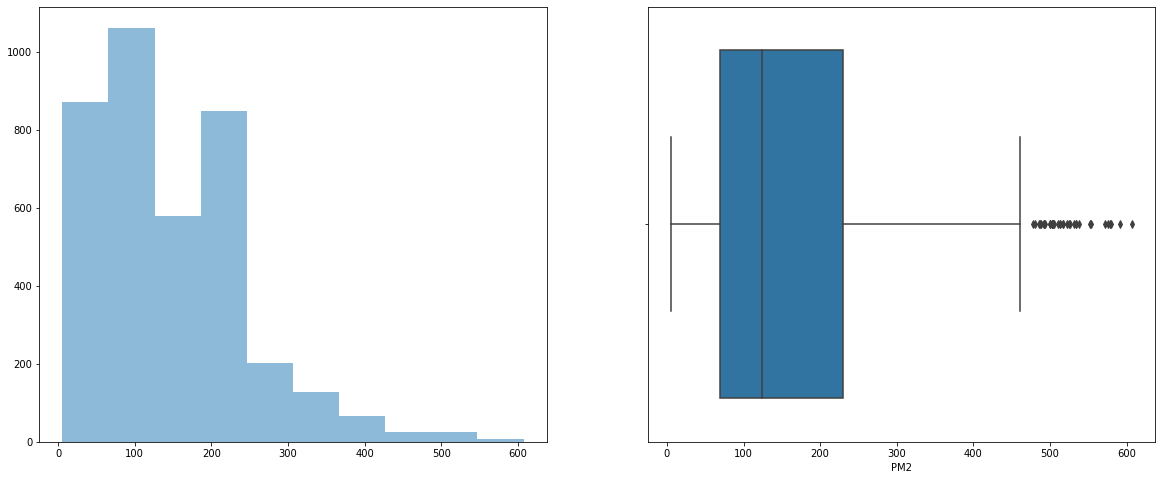

In [26]:
plotvar(df,'PM2')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


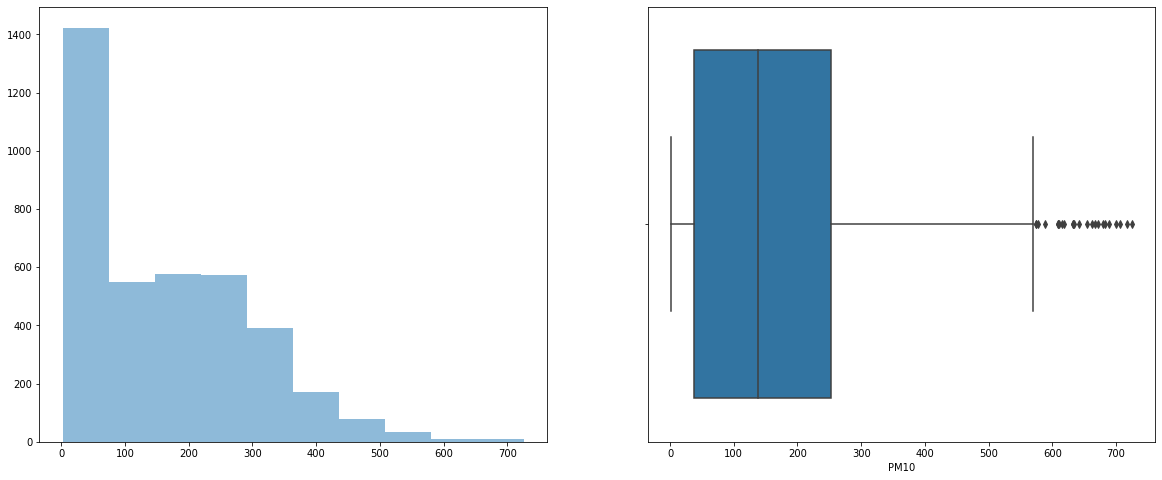

In [27]:
plotvar(df,'PM10')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


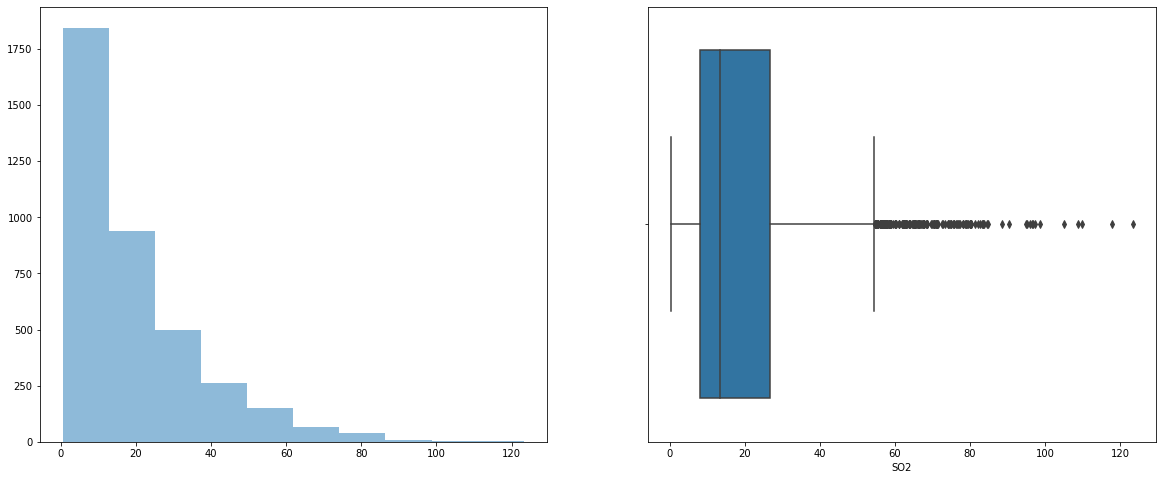

In [28]:
plotvar(df,'SO2')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


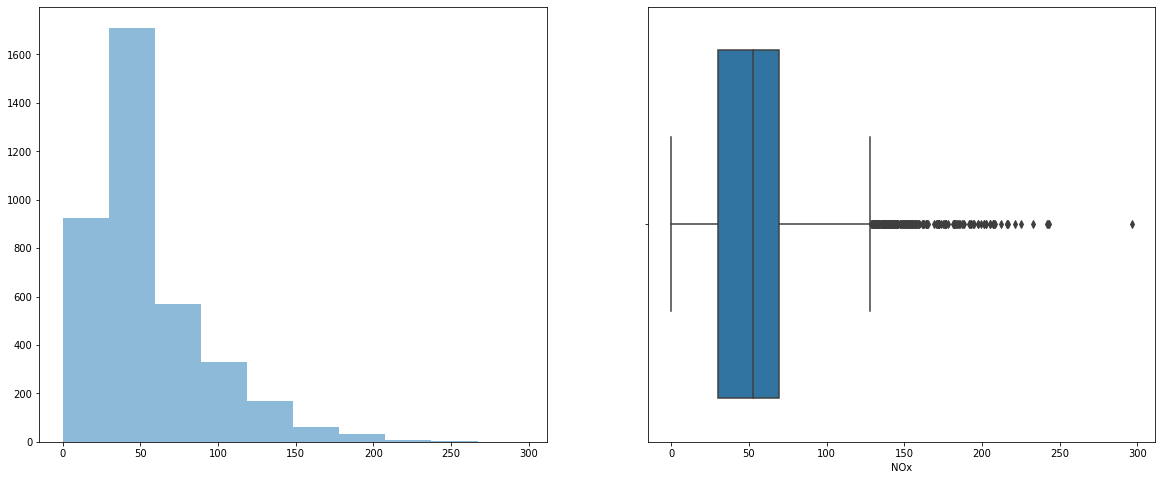

In [29]:
plotvar(df,'NOx')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


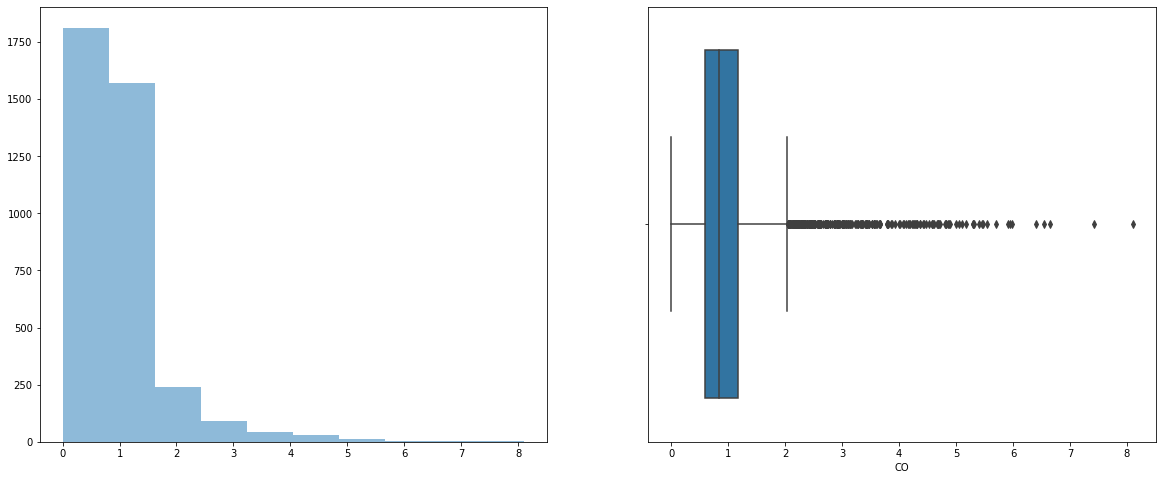

In [30]:
plotvar(df,'CO')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


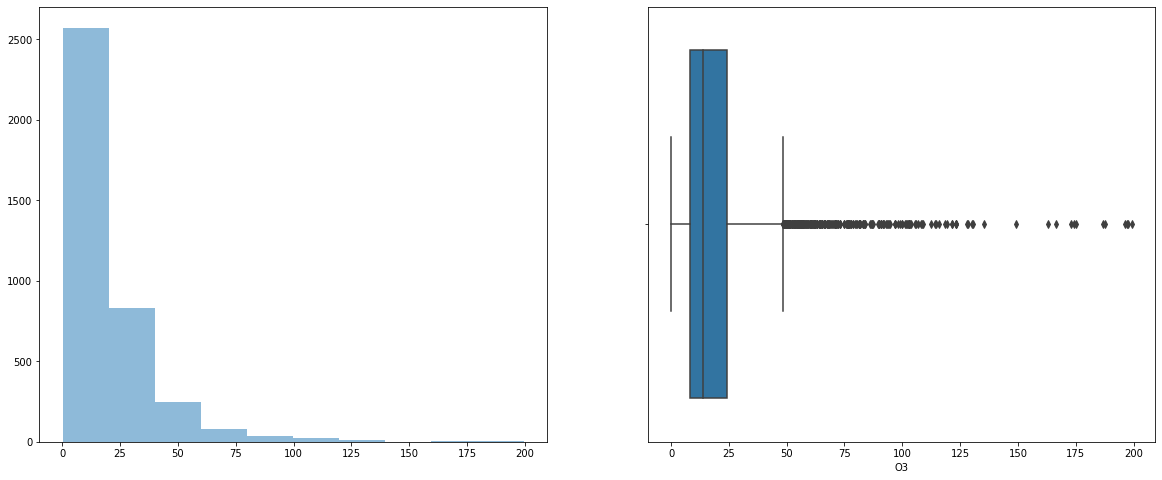

In [31]:
plotvar(df,'O3')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


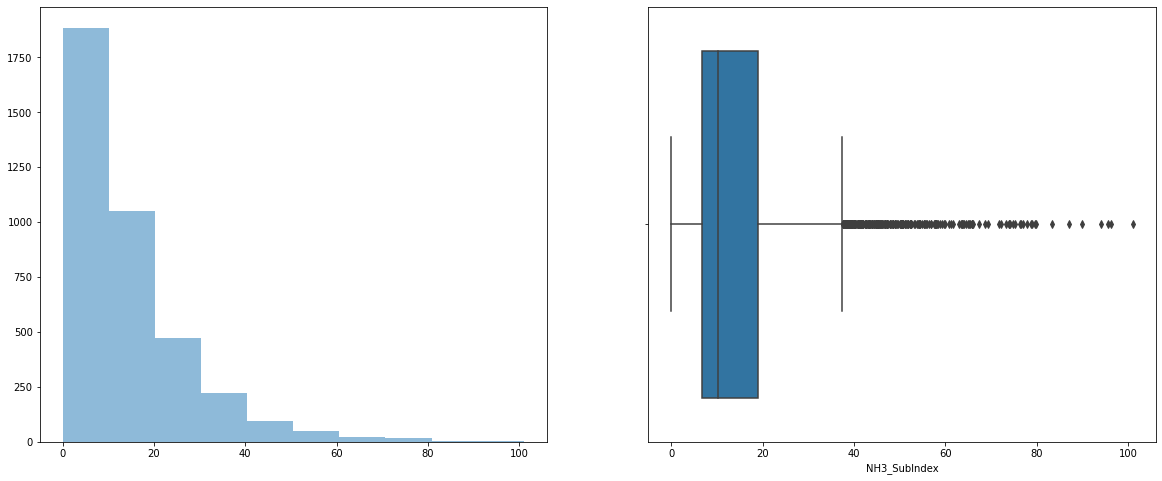

In [32]:
plotvar(df,'NH3_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


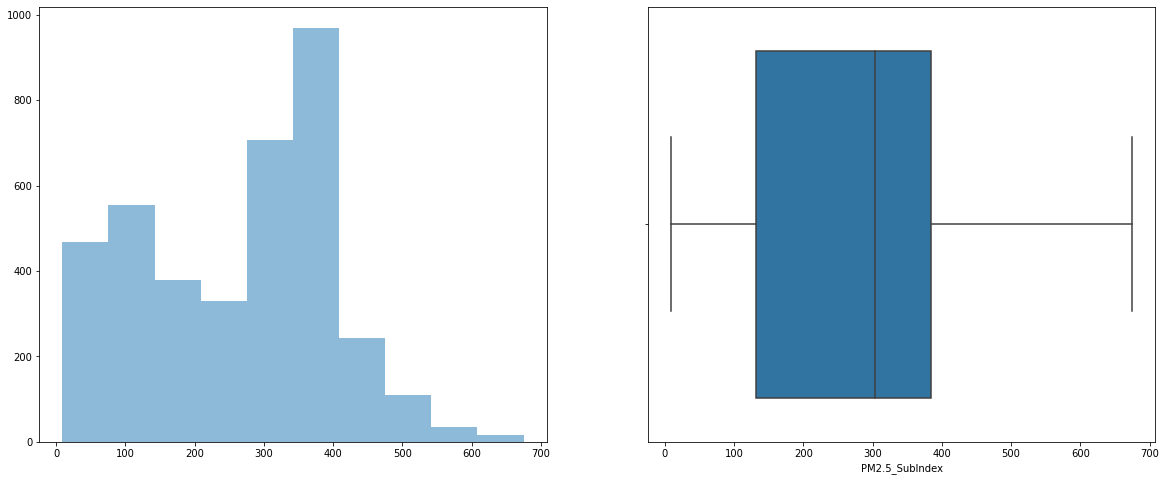

In [33]:
plotvar(df,'PM2.5_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


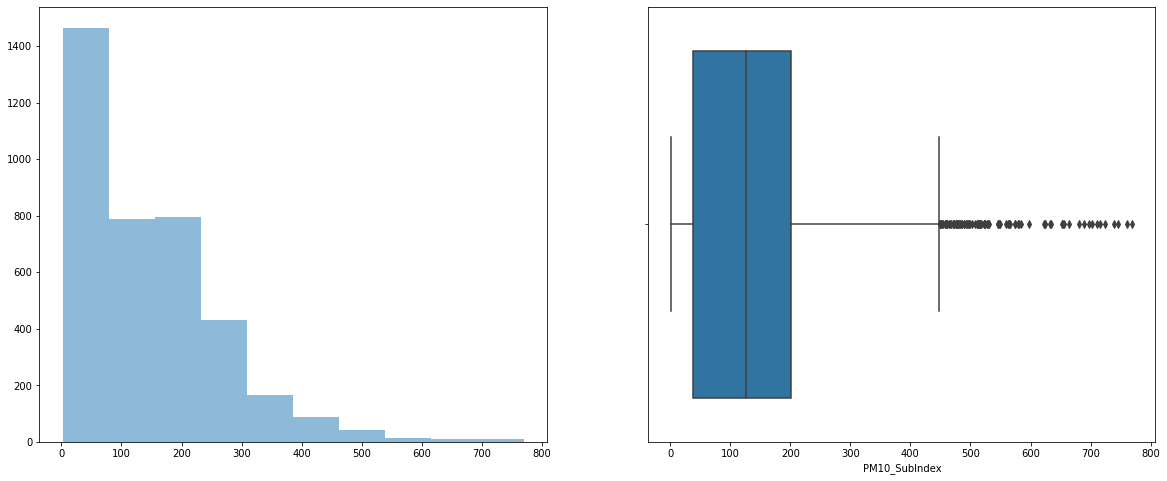

In [34]:
plotvar(df,'PM10_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


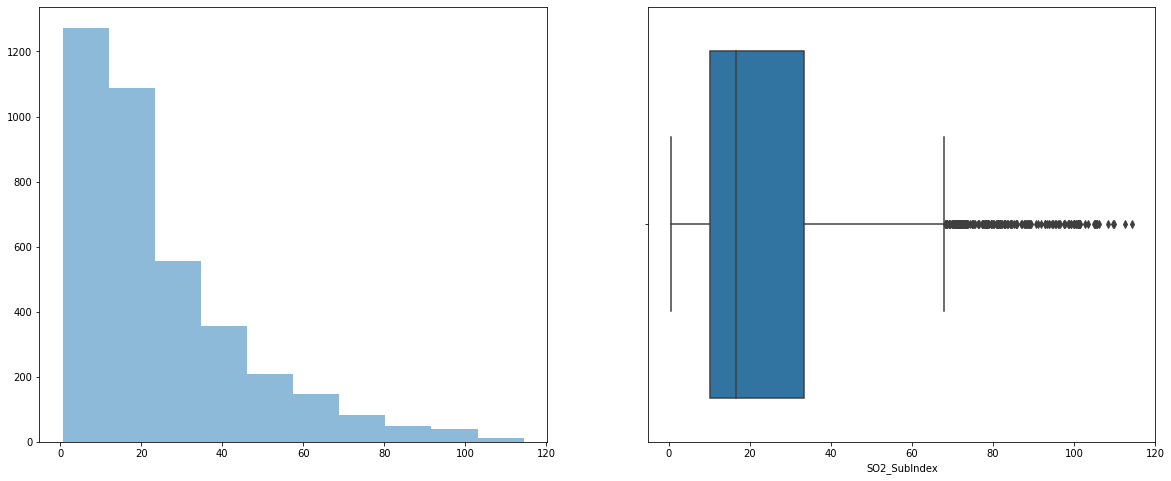

In [35]:
plotvar(df,'SO2_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


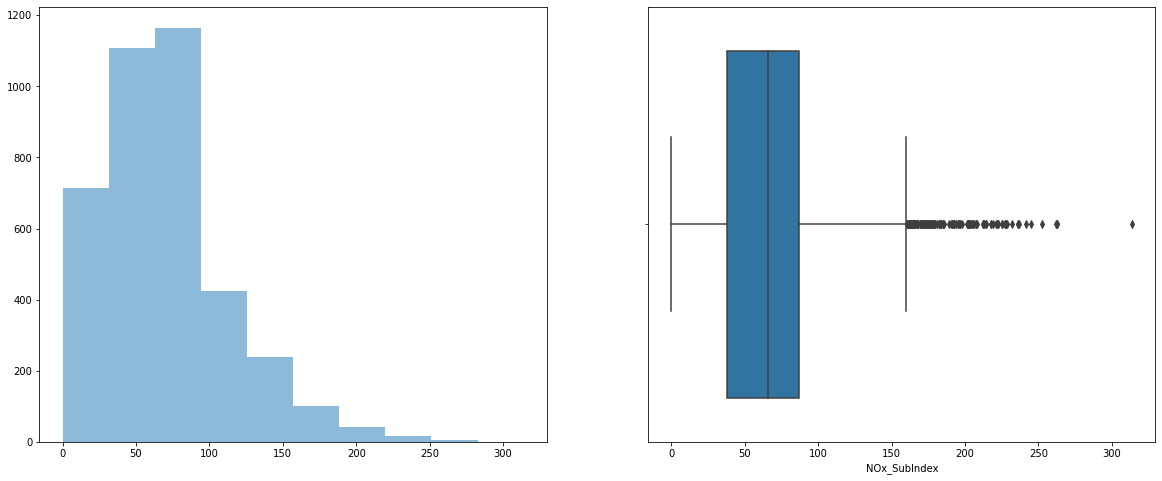

In [36]:
plotvar(df,'NOx_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


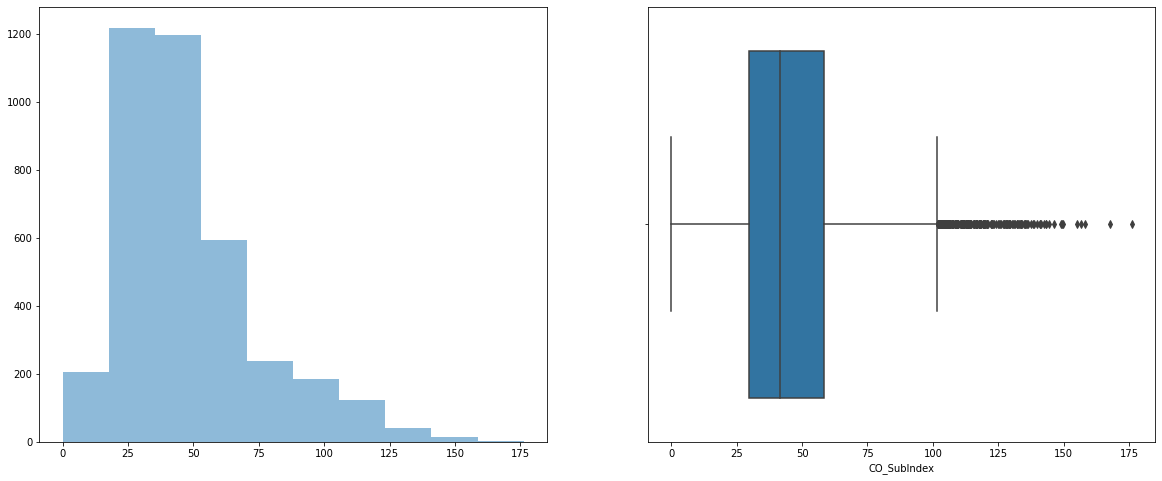

In [37]:
plotvar(df,'CO_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


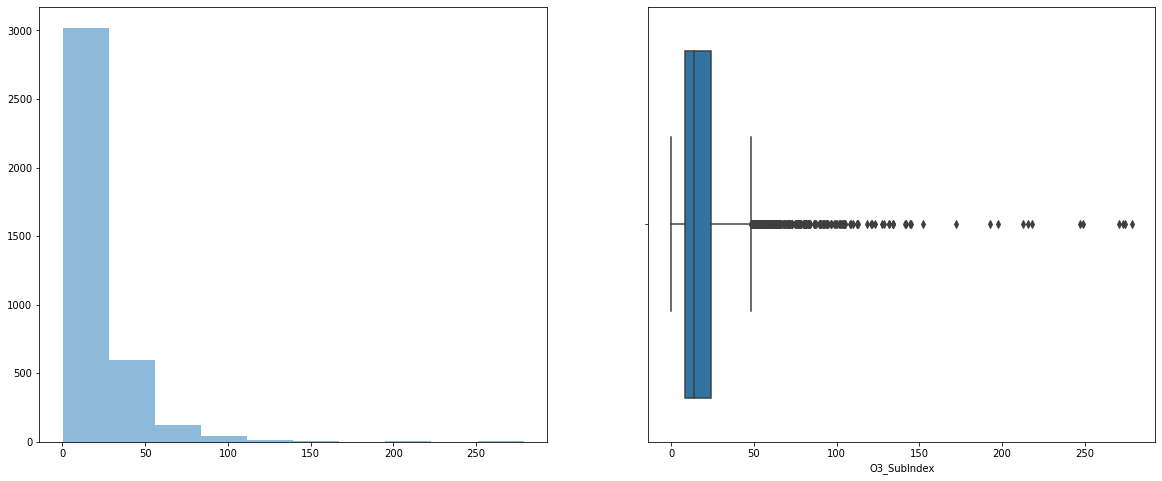

In [38]:
plotvar(df,'O3_SubIndex')

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


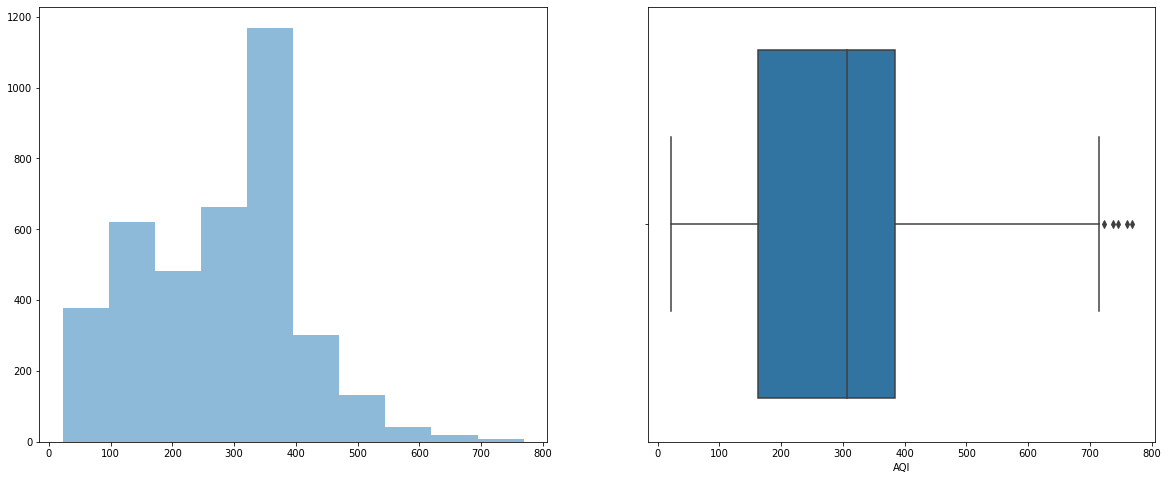

In [39]:
plotvar(df,'AQI')

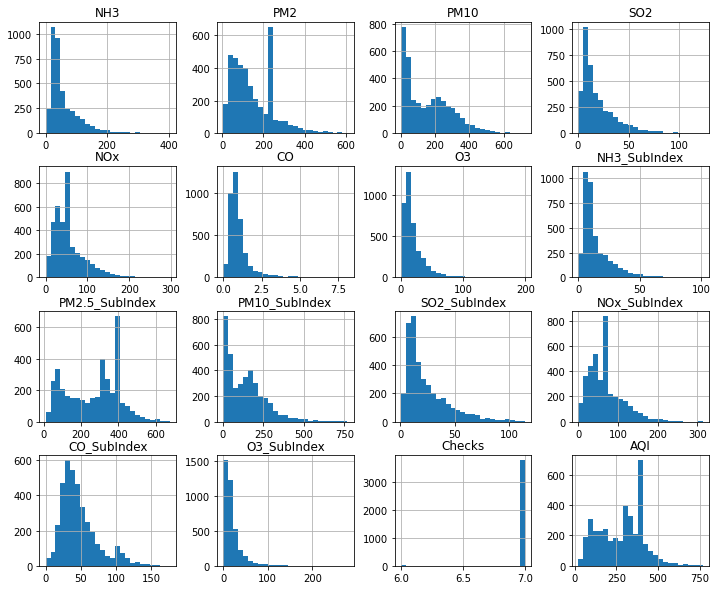

In [40]:
df.hist(figsize = (12,10), bins = 25)
plt.show()

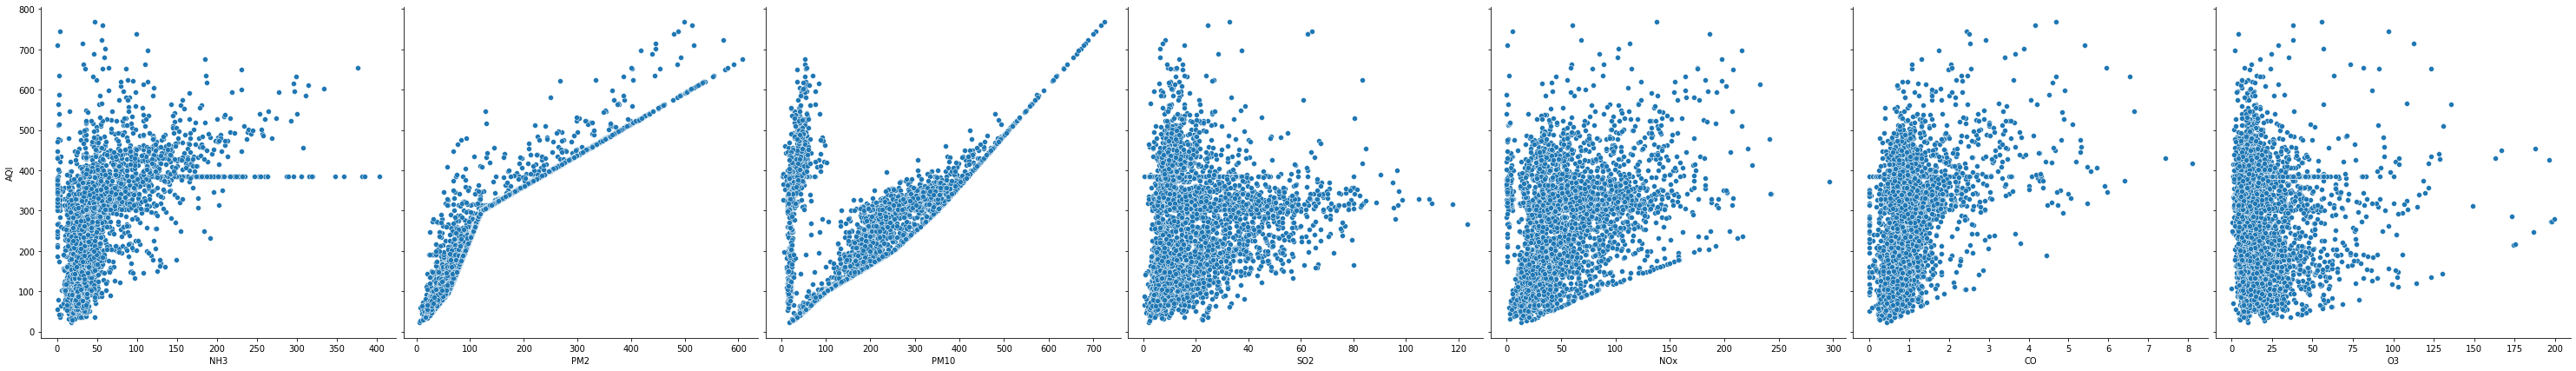

In [41]:
sns.pairplot(df, x_vars=['NH3','PM2','PM10','SO2','NOx','CO','O3',], y_vars='AQI', height=6, aspect=1, kind='scatter')
plt.show()

<Figure size 864x720 with 0 Axes>

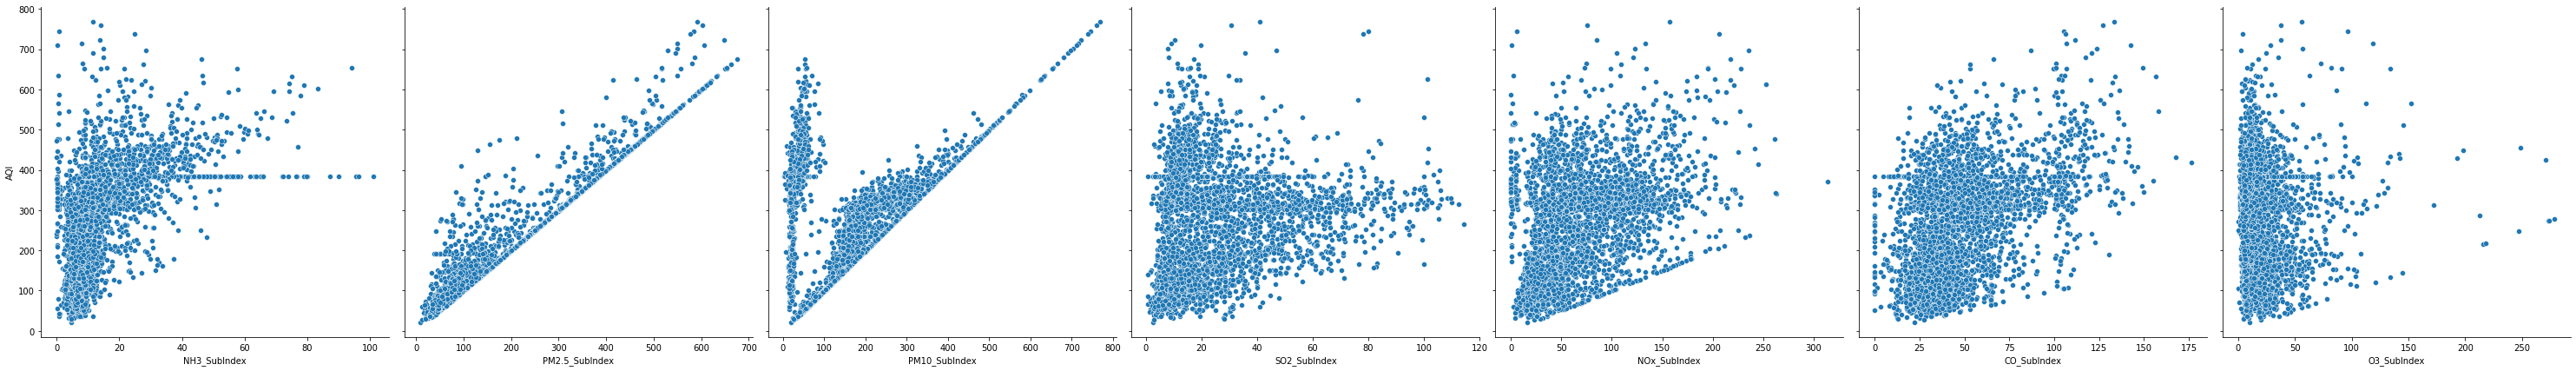

In [42]:
plt.figure(figsize=(12,10))
sns.pairplot(df, x_vars=['NH3_SubIndex','PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','CO_SubIndex','O3_SubIndex'], y_vars='AQI', height=6, aspect=1, kind='scatter')

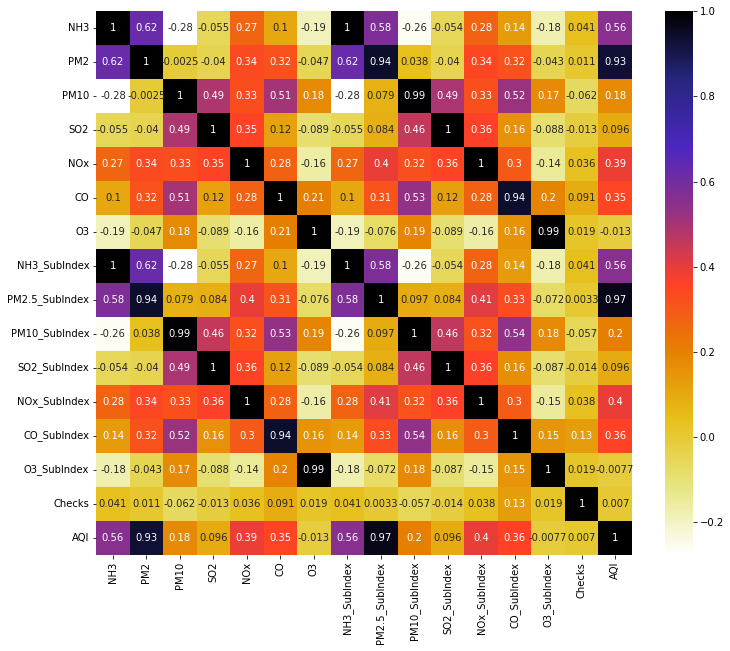

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='CMRmap_r',annot=True);

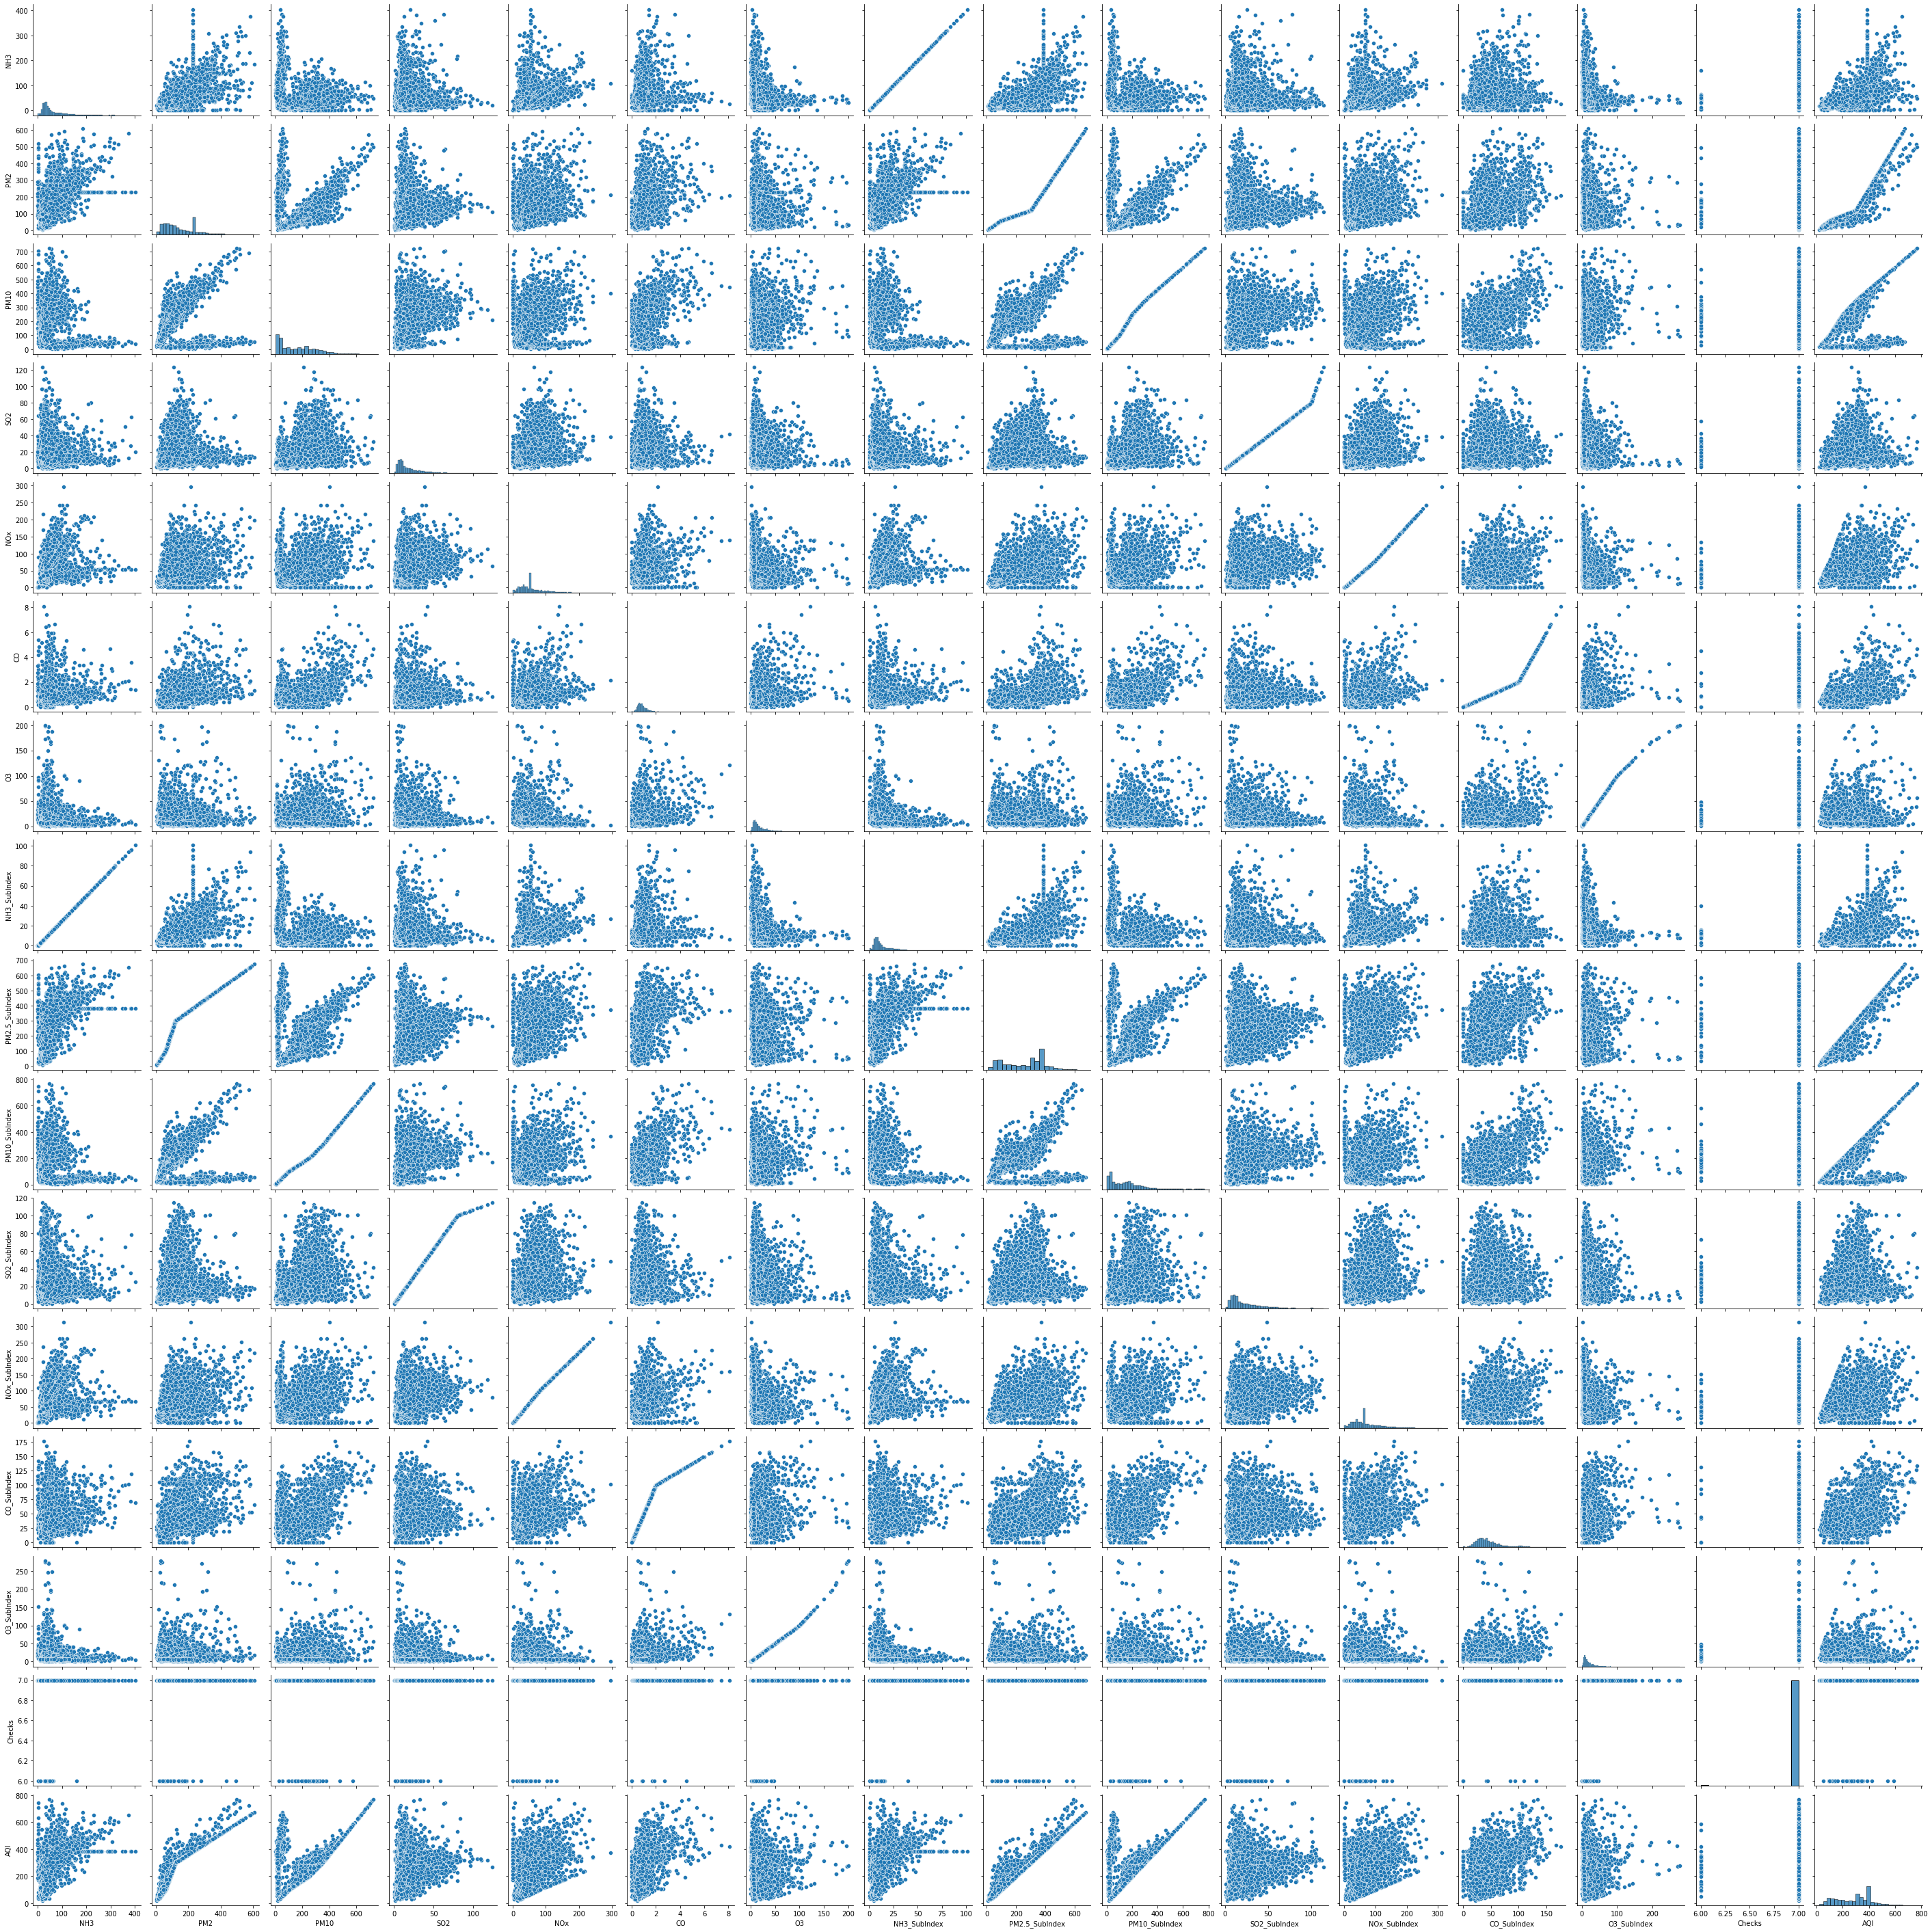

In [44]:
sns.pairplot(df)
plt.show()

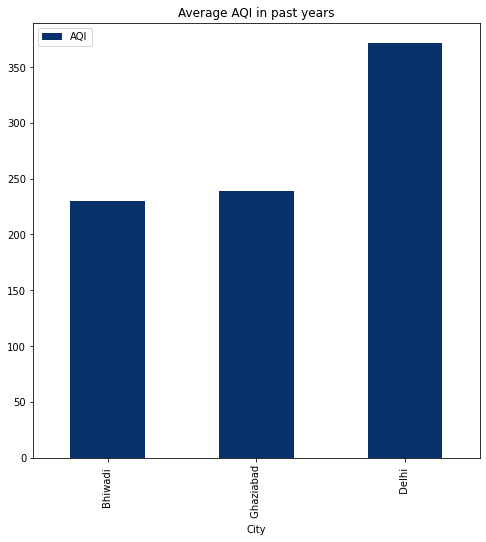

In [45]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in past years');

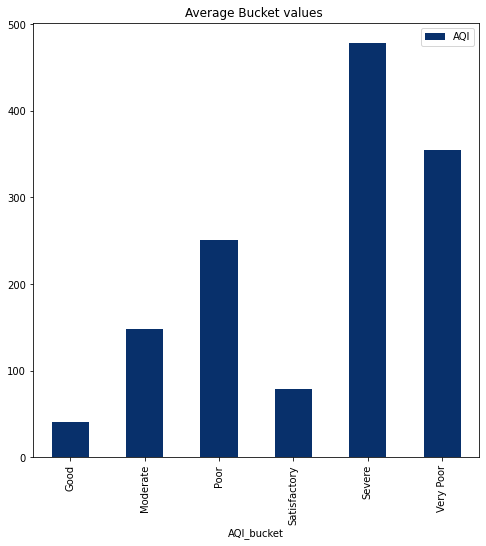

In [46]:
df[['AQI_bucket','AQI']].groupby('AQI_bucket').mean().sort_values('AQI_bucket').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average Bucket values ');

In [47]:
df

Date        City     NH3     PM2    PM10    SO2     NOx    CO  \
0     01-01-2019   Ghaziabad   71.92  327.50  501.99  20.23  141.46  3.35   
1     02-01-2019   Ghaziabad   78.02  387.45  569.04  21.29  176.59  4.06   
2     03-01-2019   Ghaziabad   74.85  399.51  527.45  18.03  133.11  3.52   
3     04-01-2019   Ghaziabad   66.06  313.46  428.54  19.64   91.64  1.89   
4     05-01-2019   Ghaziabad   64.06  251.39  351.39  18.55   63.92  2.23   
...          ...         ...     ...     ...     ...    ...     ...   ...   
3809  20-06-2022    Bhiwadi    55.93   44.41   96.75   8.57   77.94  0.72   
3810  21-06-2022    Bhiwadi    61.08   47.80  104.82   8.93   82.73  0.78   
3811  22-06-2022    Bhiwadi    65.68   74.36  165.26   9.92   89.22  1.01   
3812  23-06-2022    Bhiwadi   129.75  166.03  317.93  16.01  157.82  1.17   
3813  24-06-2022    Bhiwadi    95.88  139.99  302.08  19.60  121.95  0.89   

         O3  NH3_SubIndex  PM2.5_SubIndex  PM10_SubIndex  SO2_SubIndex  \
0     17.66       17.9800      459.615385     489.987500       25.2875   
1      9.32       19.5050      505.730769     573.800000       26.6125   
2     21.91       18.7125      515.007692     521.812500       22.5375   
3      8.96       16.5150      448.815385     398.175000       24.5500   
4      6.42       16.0150      401.069231     301.737500       23.1875   
...     ...           ...             ...            ...           ...   
3809   7.31       13.9825       74.016667      96.750000       10.7125   
3810   6.69       15.2700       79.666667     103.213333       11.1625   
3811   5.61       16.4200      147.866667     143.506667       12.4000   
3812   5.79       32.4375      335.407692     267.930000       20.0125   
3813   4.15       23.9700      315.376923     252.080000       24.5000   

      NOx_SubIndex  CO_SubIndex  O3_SubIndex  Checks    AQI    AQI_bucket  
0          161.460      116.875        17.66       7  490.0        Severe  
1          196.590      125.750         9.32       7  574.0        Severe  
2          153.110      119.000        21.91       7  522.0        Severe  
3          111.640       94.500         8.96       7  449.0        Severe  
4           79.900      102.875         6.42       7  401.0        Severe  
...            ...          ...          ...     ...    ...           ...  
3809        97.425       36.000         7.31       7   97.0  Satisfactory  
3810       102.730       39.000         6.69       7  103.0      Moderate  
3811       109.220       50.500         5.61       7  148.0      Moderate  
3812       177.820       58.500         5.79       7  335.0     Very Poor  
3813       141.950       44.500         4.15       7  315.0     Very Poor  

[3814 rows x 19 columns]

In [48]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

8

In [50]:
corr_features

{'AQI',
 'CO_SubIndex',
 'NH3_SubIndex',
 'NOx_SubIndex',
 'O3_SubIndex',
 'PM10_SubIndex',
 'PM2.5_SubIndex',
 'SO2_SubIndex'}

In [51]:
df.drop(['CO_SubIndex',
 'NH3_SubIndex',
 'NOx_SubIndex',
 'O3_SubIndex',
 'PM10_SubIndex',
 'PM2.5_SubIndex',
 'SO2_SubIndex','Checks'], axis=1, inplace= True, errors='raise')

df

Date        City     NH3     PM2    PM10    SO2     NOx    CO  \
0     01-01-2019   Ghaziabad   71.92  327.50  501.99  20.23  141.46  3.35   
1     02-01-2019   Ghaziabad   78.02  387.45  569.04  21.29  176.59  4.06   
2     03-01-2019   Ghaziabad   74.85  399.51  527.45  18.03  133.11  3.52   
3     04-01-2019   Ghaziabad   66.06  313.46  428.54  19.64   91.64  1.89   
4     05-01-2019   Ghaziabad   64.06  251.39  351.39  18.55   63.92  2.23   
...          ...         ...     ...     ...     ...    ...     ...   ...   
3809  20-06-2022    Bhiwadi    55.93   44.41   96.75   8.57   77.94  0.72   
3810  21-06-2022    Bhiwadi    61.08   47.80  104.82   8.93   82.73  0.78   
3811  22-06-2022    Bhiwadi    65.68   74.36  165.26   9.92   89.22  1.01   
3812  23-06-2022    Bhiwadi   129.75  166.03  317.93  16.01  157.82  1.17   
3813  24-06-2022    Bhiwadi    95.88  139.99  302.08  19.60  121.95  0.89   

         O3    AQI    AQI_bucket  
0     17.66  490.0        Severe  
1      9.32  574.0        Severe  
2     21.91  522.0        Severe  
3      8.96  449.0        Severe  
4      6.42  401.0        Severe  
...     ...    ...           ...  
3809   7.31   97.0  Satisfactory  
3810   6.69  103.0      Moderate  
3811   5.61  148.0      Moderate  
3812   5.79  335.0     Very Poor  
3813   4.15  315.0     Very Poor  

[3814 rows x 11 columns]

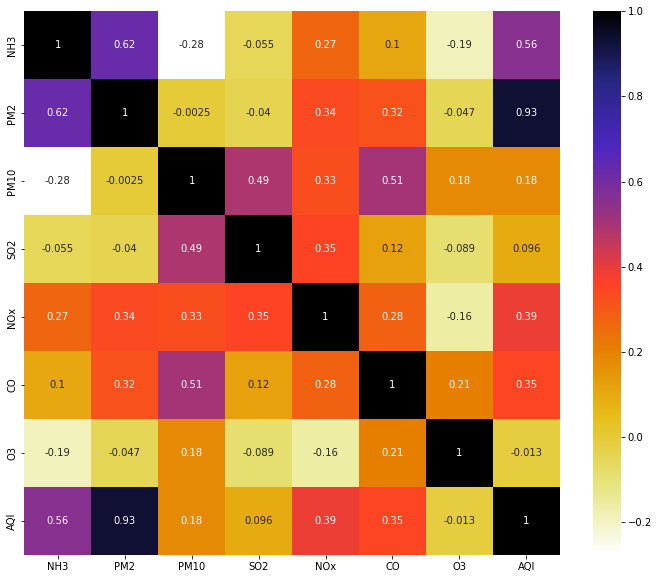

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='CMRmap_r',annot=True);

In [53]:
df.to_csv('C:\\Users\\AMAN DONGRE\\Downloads\\te.csv',index = False)